In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from folium import plugins
from folium.plugins import HeatMap
import folium

In [2]:
sns.set(style='dark')

In [3]:
df = pd.read_csv("../data/Crime_Data_from_2010_to_Present(cleaned).csv")

In [4]:
df.drop(columns='Unnamed: 0', inplace=True)
df.head()

,Year,Month,Area,Crime Code,Crime,Vict Age,Vict Descent,Weapon Code,Weapon,Premises Code,Premises,LAT,LON
0,2010,1,Hollywood,900,VIOLATION OF COURT ORDER,47,White,102.0,HAND GUN,101.0,STREET,34.1016,-118.3295
1,2010,1,Central,122,"RAPE, ATTEMPTED",47,Hispanic,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",103.0,ALLEY,34.0387,-118.2488
2,2010,1,Central,624,BATTERY - SIMPLE ASSAULT,38,Black,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",101.0,STREET,34.0640,-118.2375
3,2010,1,Central,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",24,White,NaN,NaN,102.0,SIDEWALK,34.0409,-118.2609
4,2010,1,Central,755,BOMB SCARE,29,Black,500.0,UNKNOWN WEAPON/OTHER WEAPON,738.0,LIBRARY,34.0502,-118.2540


In [5]:
to_plot = pd.DataFrame(df['Vict Descent'].value_counts()).drop(['Other','Unknown'],axis=0)

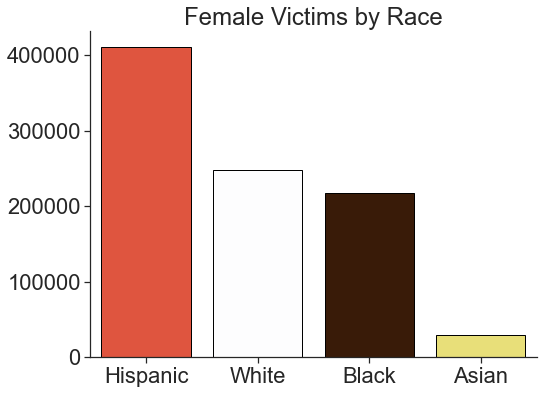

In [6]:
plt.figure(figsize=(8,6))

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks",font_scale=2, rc=custom_params)

colors =['xkcd:orangey red','xkcd:pale grey','xkcd:chocolate brown','xkcd:yellowish']

ax = sns.barplot(x = to_plot.index, y='Vict Descent',palette = colors ,edgecolor = 'black', data=to_plot, ci=None)
ax.set(xlabel= None, ylabel= None, title='Female Victims by Race')

plt.show()

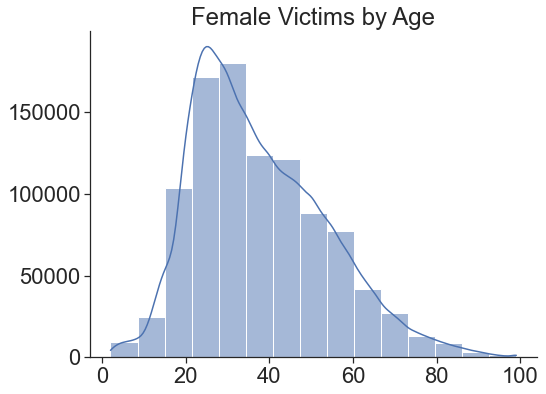

In [7]:
plt.figure(figsize=(8,6))
age = sns.histplot(df['Vict Age'], kde = True, bins = 15)
plt.title('Female Victims by Age')
plt.ylabel(None)
plt.xlabel(None)
plt.show()

In [8]:
to_plot1 = pd.DataFrame(df['Area'].value_counts())
dangerous = to_plot1.head(5)

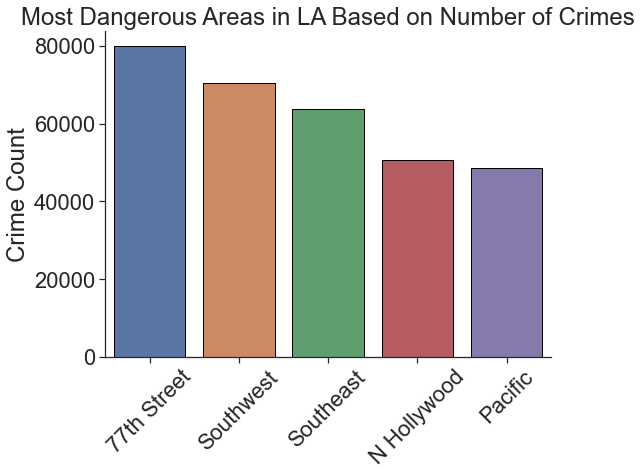

In [9]:
plt.figure(figsize=(8,6))
ax = sns.barplot( x= dangerous.index, y='Area', data = dangerous, edgecolor = 'black')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.ylabel('Crime Count')
plt.title('Most Dangerous Areas in LA Based on Number of Crimes')
plt.show()

In [10]:
safest = to_plot1.tail(5).sort_values(by='Area')

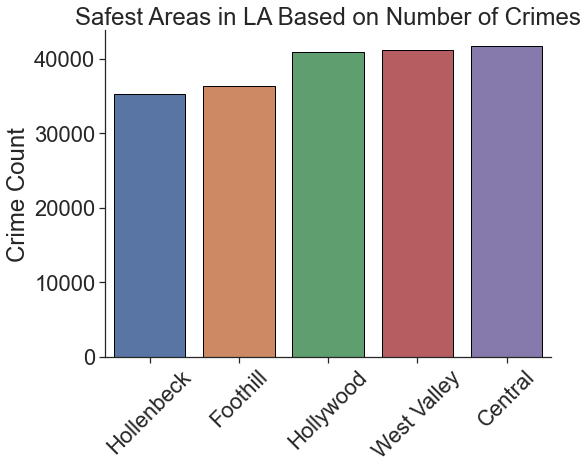

In [11]:
plt.figure(figsize=(8,6))
ax = sns.barplot( x= safest.index, y='Area', data = safest , edgecolor = 'black')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)
plt.ylabel('Crime Count')
plt.title('Safest Areas in LA Based on Number of Crimes')
plt.show()

In [12]:
d_area = df[df['Area'].str.contains('77th Street|Southwest|Southeast|N Hollywood|Pacific', regex=True)]

In [13]:
to_plot2 = d_area.groupby(['Area','Premises'])['Crime'].count().reset_index()


In [14]:
d = pd.DataFrame(to_plot2[(to_plot2['Area'] == '77th Street')].max())
d = d.T
c = pd.DataFrame(to_plot2[(to_plot2['Area'] == 'Southwest')].max())
c = c.T
l = pd.DataFrame(to_plot2[(to_plot2['Area'] == 'Southeast')].max())
l = l.T
k = pd.DataFrame(to_plot2[(to_plot2['Area'] == 'N Hollywood')].max())
k = k.T
x = pd.DataFrame(to_plot2[(to_plot2['Area'] == 'Pacific')].max())
x = x.T
merge = pd.concat([d,c,l,k,x])


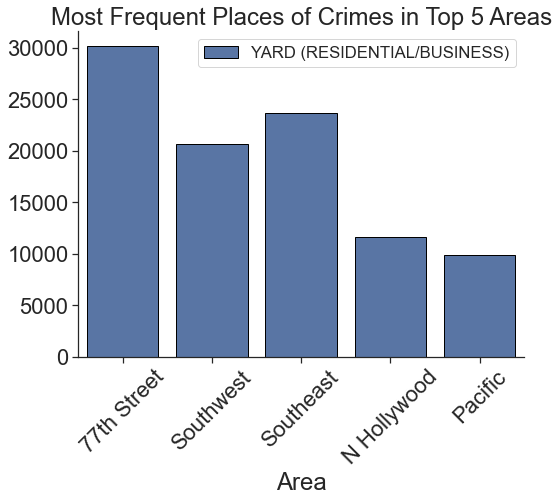

In [15]:
plt.figure(figsize = [8,6])
plot = sns.barplot(x = 'Area', y='Crime', hue = 'Premises', 
                edgecolor = 'black', data=merge)
plot.set(xlabel='Area', ylabel = None, title='Most Frequent Places of Crimes in Top 5 Areas')
plot.set_xticklabels(plot.get_xticklabels(),rotation = 45)
plot.legend( fontsize = 'x-small')

plt.show()

In [16]:
top_crime1 = df[(df['Year'] >= 2010) & (df['Year'] <= 2015)].groupby('Crime')['Weapon'].count().sort_values(ascending = False).reset_index().head(5)
top_crime1

,Crime,Weapon
0,BATTERY - SIMPLE ASSAULT,62368
1,INTIMATE PARTNER - SIMPLE ASSAULT,49247
2,CRIMINAL THREATS - NO WEAPON DISPLAYED,16848
3,ROBBERY,14288
4,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",13168


In [17]:
top_crime2 = df[(df['Year'] >= 2016) & (df['Year'] <= 2021)].groupby('Crime')['Weapon'].count().sort_values(ascending = False).reset_index().head(5)
top_crime2

,Crime,Weapon
0,INTIMATE PARTNER - SIMPLE ASSAULT,49808
1,BATTERY - SIMPLE ASSAULT,47831
2,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",16803
3,CRIMINAL THREATS - NO WEAPON DISPLAYED,13416
4,ROBBERY,12718


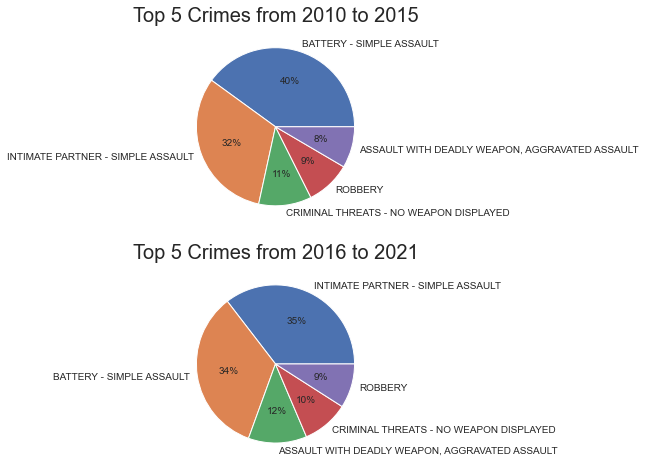

In [18]:

fig , ax1 = plt.subplots(2, figsize = [12,8])

ax1[0].pie(top_crime1['Weapon'], labels = top_crime1['Crime'], autopct='%.0f%%', textprops = {'fontsize':10})
ax1[0].set_title('Top 5 Crimes from 2010 to 2015',fontsize = 20,)
ax1[1].pie(top_crime2['Weapon'], labels = top_crime2['Crime'], autopct='%.0f%%',textprops = {'fontsize':10})
ax1[1].set_title('Top 5 Crimes from 2016 to 2021', fontsize = 20)
plt.show()

In [19]:
rapes = df[((df['Crime'].str.contains('RAPE')) | (df['Crime'] == 'BATTERY WITH SEXUAL CONTACT'))]

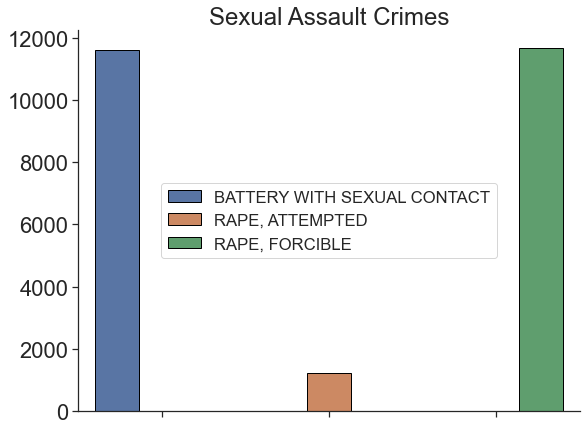

In [20]:
x = rapes.groupby('Crime')['Year'].count().index
y = rapes.groupby('Crime')['Year'].count().values

plt.figure(figsize = [9,7])
g = sns.barplot( x= x, y = y, hue=x, edgecolor = 'black')
g.set(xlabel=None, ylabel = None, title='Sexual Assault Crimes')
g.legend(fontsize = 'x-small', loc = 'center')
g.set_xticklabels([])
plt.show()

In [21]:
a = pd.DataFrame(rapes.groupby(['Crime','Vict Age'])['Year'].count())


In [22]:
a.reset_index(inplace = True)

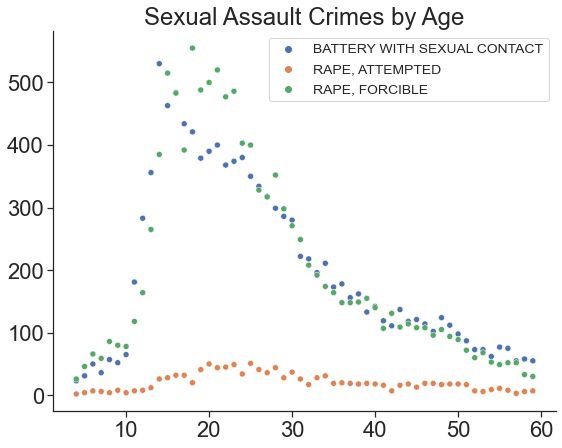

In [23]:
plt.figure(figsize = [9,7])
h = sns.scatterplot(x='Vict Age' , y = 'Year', hue = 'Crime', data = a[((a['Vict Age'] > 3) & (a['Vict Age'] < 60))])
h.set(xlabel= None, ylabel = None, title='Sexual Assault Crimes by Age')
h.legend(fontsize = 'xx-small', loc = 'upper right')
plt.show()

In [26]:
import warnings
warnings.filterwarnings('ignore')

map_heat = folium.Map(location=[34.017755, -118.343251],
                    zoom_start = 9) 

rapes['LAT'] = rapes['LAT'].astype(float)
rapes['LON'] = rapes['LON'].astype(float)

In [27]:
heat_df = rapes[rapes['Year']<=2013]
heat_df = rapes[['LAT', 'LON']]
heat_df = heat_df.dropna(axis=0, subset=['LAT', 'LON'])

heat_data = [[row['LAT'],row['LON']] for index, row in heat_df.iterrows()]

HeatMap(heat_data).add_to(map_heat)

map_heat